In [25]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()


11490434/11490434 [==============================] - 2s 0us/step


In [3]:
#print shape of data
print("X_train shape: ", X_train.shape)
print("y_train shape: ", y_train.shape)
print("X_test shape: ", X_test.shape)
print("y_test shape: ", y_test.shape)

X_train shape:  (60000, 28, 28)
y_train shape:  (60000,)
X_test shape:  (10000, 28, 28)
y_test shape:  (10000,)


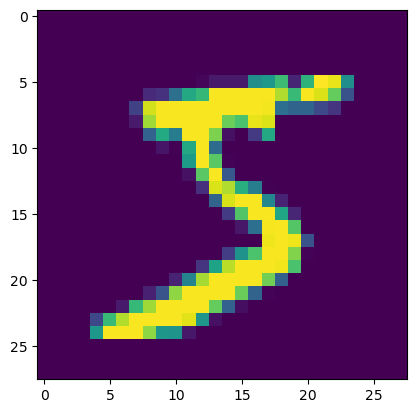

In [7]:
#display the first image in the training data
plt.imshow(X_train[0])


In [42]:
tf.random.set_seed(1234)
model = Sequential(
    [
        tf.keras.Input(X_train.shape[1:]),
        Flatten(),
        Dense(units = 25, activation = 'relu', name = 'layer1'),
        Dense(units = 15, activation = 'relu', name = 'layer2'),
        Dense(units = 10, activation = 'linear', name = 'layer3')
    ], name = 'my_model'
)


In [43]:
model.summary()

Model: "my_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 layer1 (Dense)              (None, 25)                19625     
                                                                 
 layer2 (Dense)              (None, 15)                390       
                                                                 
 layer3 (Dense)              (None, 10)                160       
                                                                 
Total params: 20,175
Trainable params: 20,175
Non-trainable params: 0
_________________________________________________________________


In [60]:
model.compile(
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001)
)

model.fit(
    X_train,y_train,
    epochs=10
)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.8771
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.8770
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.8769
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.8769
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.8769
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.8769
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.8769
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.8768
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.8769
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.8769


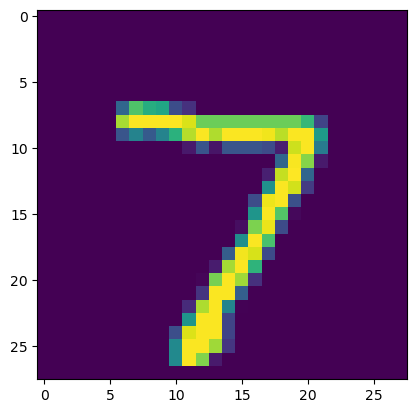

In [61]:
#display data of X_test[0]
plt.imshow(X_test[0])

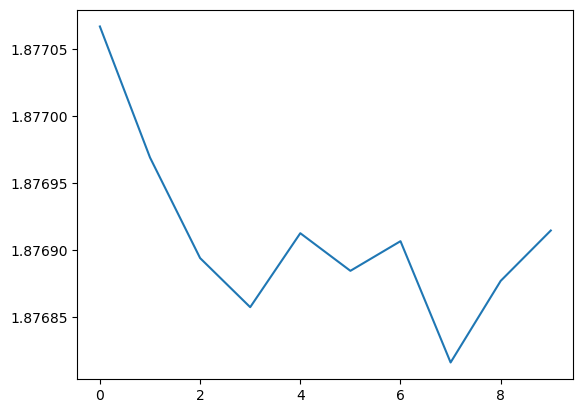

In [62]:
#plot the loss history of the model
plt.plot(model.history.history['loss'])


In [63]:
image_of_seven = X_test[0]
prediction = model.predict(image_of_seven.reshape(1,28,28))
print(prediction)

1/1 [==============================] - 0s 62ms/step
[[ 1.8523108  -2.560712   -0.9114089   0.40856636  2.061147    0.8179977
  -2.1477978   2.1154103  -1.3735378   2.0994544 ]]


In [64]:
prediction_p = tf.nn.softmax(prediction)
print(prediction_p)

tf.Tensor(
[[0.18056127 0.00218813 0.01138561 0.04262009 0.2224954  0.0641842
  0.00330674 0.23490232 0.00717227 0.23118398]], shape=(1, 10), dtype=float32)


In [65]:
yhat = np.argmax(prediction_p)
print(yhat)

7
